In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
def discretize_q_values(row, col_q_val):
    q_val = row[col_q_val]
    if q_val < 0.01:
        q_val_d = 3
    elif q_val < 0.05:
        q_val_d = 2
    else:
        q_val_d = 1
    return q_val_d

def unknown_essential_xy(df_vis):
    
#     df_vis = selected_data.dropna(subset=['Annotation'])
#     df_vis = df_vis.reset_index(drop=True)

    # NO MORE RANDOMIZATION! Instead this: 
    rv_id_list = []
    x_coords_list = []
    y_coords_list = []
    color_list = []
    scatter_size_list = []
    lw_list = []

    for ann in [1, 2, 3, 4, 5]:
        for qq in [1,2,3]:

            df = df_vis[(df_vis.q_val_D.values == qq) & (df_vis.Annotation.values == ann)]
            # update rv_id list
            rv_id_list.append( list(df.Rv_ID.values) )

            if df.shape[0] < 30:
                scatter_size = 200
                edge_param = 0.40
                lw=4
            elif df.shape[0] < 100:
                scatter_size = 200
                edge_param = 0.40
                lw=3
            elif df.shape[0] < 200:
                scatter_size = 30
                edge_param = 0.45
                lw=2
            elif df.shape[0] < 400:
                scatter_size = 30
                edge_param = 0.45
                lw=2
            else:
                scatter_size = 30
                edge_param = 0.45
                lw=1

            # Update scatter marker size
            scatter_size_list += [scatter_size]*df.shape[0]
            # Update line-width size
            lw_list += [lw]*df.shape[0]

            if ann <=2 and qq >= 2:
                color_temp = '#2b7bba'
            else:
                color_temp = '#585858'

            # update color_list
            color_list+=[color_temp]*df.shape[0]

            # num_sqrs = int(np.ceil(np.sqrt(df.shape[0])))
            num_sqrs = np.max([int(np.ceil(np.sqrt(df.shape[0]))), 10])

            xrange = np.linspace(ann-edge_param, ann+edge_param, num_sqrs)
            yrange = np.linspace(qq+edge_param, qq-edge_param, num_sqrs)

            coords = list(itertools.product(yrange, xrange))
            coords = coords[:df.shape[0]]
            x_coords = [c[1] for c in coords]
            y_coords = [c[0] for c in coords]
            # update coordinates
            x_coords_list += x_coords
            y_coords_list += y_coords
    return x_coords_list, y_coords_list, color_list, rv_id_list, scatter_size_list, lw_list

Load annotation scores and q-values:

In [3]:
file_annotation = '../../data/annotations/uniprot_annotation_scores.csv'
df_UNP = pd.read_csv(file_annotation)

file_qval = '/Users/amandaspencer/Documents/mtb_tn_db/data/standardized_data/result_qval_matrix_2023_02_20_CC_BxD_processed.csv'
df_qval = pd.read_csv(file_qval)

file_lfc = '/Users/amandaspencer/Documents/mtb_tn_db/data/standardized_data/result_logfc_matrix_2023_02_20_CC_BxD_processed.csv'
df_lfc = pd.read_csv(file_lfc)

# Counting how many unknown essentials are in each screen 

In [4]:
df_UNP.head(2)

Rv_ID  Annotation
0  Rv0001           4
1  Rv0002           4

In [5]:
df_qval.head(2)

Rv_ID  PE35_KO_vs_mbio_H37Rv  PPE68_KO_vs_mbio_H37Rv  Rv0950c_KO_vs_CB_WT  \
0  Rv0001                    1.0                     1.0                  1.0   
1  Rv0002                    1.0                     1.0                  1.0   

   Rv0954_KO_vs_RJ_WT  Rv1096_KO_vs_CB_WT  \
0                 1.0                 1.0   
1                 1.0                 1.0   

   Rv3005c_KO_day32_vs_dejesus_H37Rv_day32  Rv3594_KO_vs_Rubin_FLUTE_WT  \
0                                  0.73174                          1.0   
1                                  1.00000                          1.0   

   Rv3684_KO_vs_CB_WT  Rv3717_KO_vs_Rubin_FLUTE_WT  ...  \
0                 1.0                          1.0  ...   
1                 1.0                          1.0  ...   

   BXD69_vs_in_vitro_H37Rv  BXD73_vs_in_vitro_H37Rv  BXD73b_vs_in_vitro_H37Rv  \
0                      1.0                      1.0                       1.0   
1                      1.0                      1.0                       1.0   

   BXD77_vs_in_vitro_H37Rv  BXD79_vs_in_vitro_H37Rv  BXD90_vs_in_vitro_H37Rv  \
0                      1.0                      1.0                      1.0   
1                      1.0                      1.0                      1.0   

   BXD93_vs_in_vitro_H37Rv  BXD9_vs_in_vitro_H37Rv  \
0                      1.0                     1.0   
1                      1.0                     1.0   

   C57BL.6J_vs_in_vitro_H37Rv  DBA.2J_vs_in_vitro_H37Rv  
0                         1.0                       1.0  
1                         1.0                       1.0  

[2 rows x 147 columns]

In [6]:
df_lfc.head(2)

Rv_ID  PE35_KO_vs_mbio_H37Rv  PPE68_KO_vs_mbio_H37Rv  Rv0950c_KO_vs_CB_WT  \
0  Rv0001                  -0.41                    0.01                  0.0   
1  Rv0002                   3.28                    2.38                  0.0   

   Rv0954_KO_vs_RJ_WT  Rv1096_KO_vs_CB_WT  \
0                 0.0                 0.0   
1                 0.0                 0.0   

   Rv3005c_KO_day32_vs_dejesus_H37Rv_day32  Rv3594_KO_vs_Rubin_FLUTE_WT  \
0                                     3.12                        -0.06   
1                                     0.00                         0.00   

   Rv3684_KO_vs_CB_WT  Rv3717_KO_vs_Rubin_FLUTE_WT  ...  \
0                 0.0                        -0.06  ...   
1                 0.0                         0.00  ...   

   BXD69_vs_in_vitro_H37Rv  BXD73_vs_in_vitro_H37Rv  BXD73b_vs_in_vitro_H37Rv  \
0                      0.0                      0.0                       0.0   
1                      0.0                      0.0                       0.0   

   BXD77_vs_in_vitro_H37Rv  BXD79_vs_in_vitro_H37Rv  BXD9_vs_in_vitro_H37Rv  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   

   BXD90_vs_in_vitro_H37Rv  BXD93_vs_in_vitro_H37Rv  \
0                     0.00                      0.0   
1                     0.48                      0.0   

   C57BL.6J_vs_in_vitro_H37Rv  DBA.2J_vs_in_vitro_H37Rv  
0                         0.0                       0.0  
1                         0.0                       0.0  

[2 rows x 147 columns]

In [7]:
# Merge dataframes on 'Rv_ID'
merged_df = df_qval.merge(df_lfc, on='Rv_ID', suffixes=('_qval', '_lfc')).merge(df_UNP, on='Rv_ID')
# Initialize results dictionary
results = {}
# Iterate through each screen
for screen in df_qval.columns[1:]:
    essential_genes = merged_df[(abs(merged_df[f'{screen}_lfc']) >= 1) & (merged_df[f'{screen}_qval'] <= 0.05) & (merged_df['Annotation'] == 1)]
    results[screen] = len(essential_genes)

In [8]:
# Function to calculate the distribution of screens based on the number of essential, low annotation genes
def screen_distribution(results, N):
    count = sum(1 for count in results.values() if count > N)
    return count
# Define N
N = 30
# Calculate the distribution
distribution_count = screen_distribution(results, N)
distribution_count


29

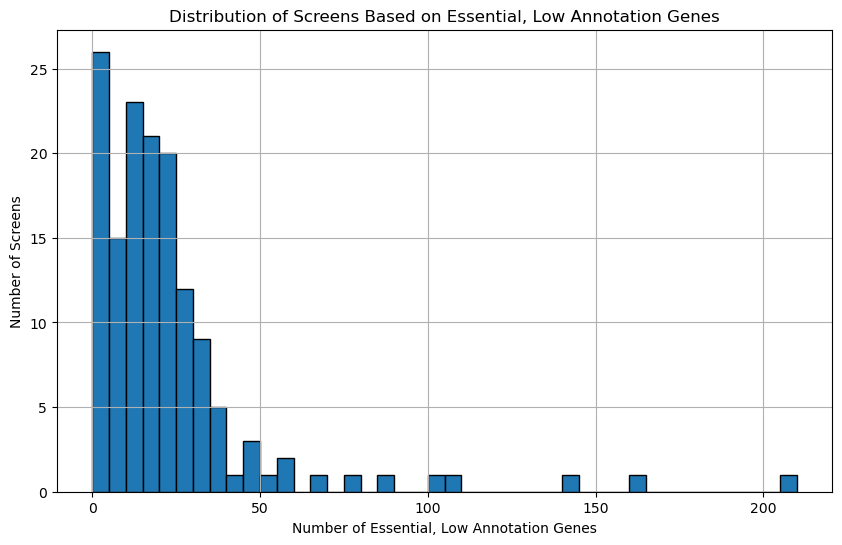

In [9]:
# Create a list of the number of essential, low annotation genes for each screen
gene_counts = list(results.values())
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(gene_counts, bins=range(0, max(gene_counts) + 1, 5), edgecolor='black')
plt.xlabel('Number of Essential, Low Annotation Genes')
plt.ylabel('Number of Screens')
plt.title('Distribution of Screens Based on Essential, Low Annotation Genes')
plt.grid(True)
plt.show()

In [10]:
# Function to get screens with more than N essential, low annotation genes
def screens_with_more_than(results, N):
    return [screen for screen, count in results.items() if count > N]
# Define N
N = 50
# Get screens with more than N essential, low annotation genes
screens_above_threshold = screens_with_more_than(results, N)
screens_above_threshold

['dejesus_H37Rv_day32_vs_dejesus_H37Rv_day0',
 'dejesus_Rv1432_day0_vs_dejesus_H37Rv_day0',
 'dejesus_Rv1432_day32_vs_dejesus_H37Rv_day32',
 'dejesus_Rv1565c_day0_vs_dejesus_H37Rv_day0',
 'dejesus_Rv1565c_day32_vs_dejesus_H37Rv_day32',
 'marP_KO_vs_marP_WT',
 'ritterhaus_hypoxia_H6_vs_ritterhaus_hypoxia_input',
 'xu_inh_025_vs_xu_inh_0',
 'zhang_wt_mouse_d45_vs_zhang_input_library',
 'mbio_H37Rv_vs_in_vitro']

Select a screen. Discretize q-values. Merge with annotation scores: 

In [11]:
col_screen = 'dejesus_H37Rv_day32_vs_dejesus_H37Rv_day0'

df_qval_screen = df_qval[['Rv_ID', col_screen]].copy()
# Discretize q-values: 
df_qval_screen['q_val_D'] = df_qval_screen.apply(discretize_q_values, 1, args=[col_screen])
# Merge with unknowns: 
df_vis = df_qval_screen.merge(df_UNP, on = ['Rv_ID'], how = 'inner')

Call bubble plot function to get coordinates, colors, and sizes: 

In [12]:
x_coords_list, y_coords_list, color_list, rv_id_list, scatter_size_list, lw_list = unknown_essential_xy(df_vis)

Plot:

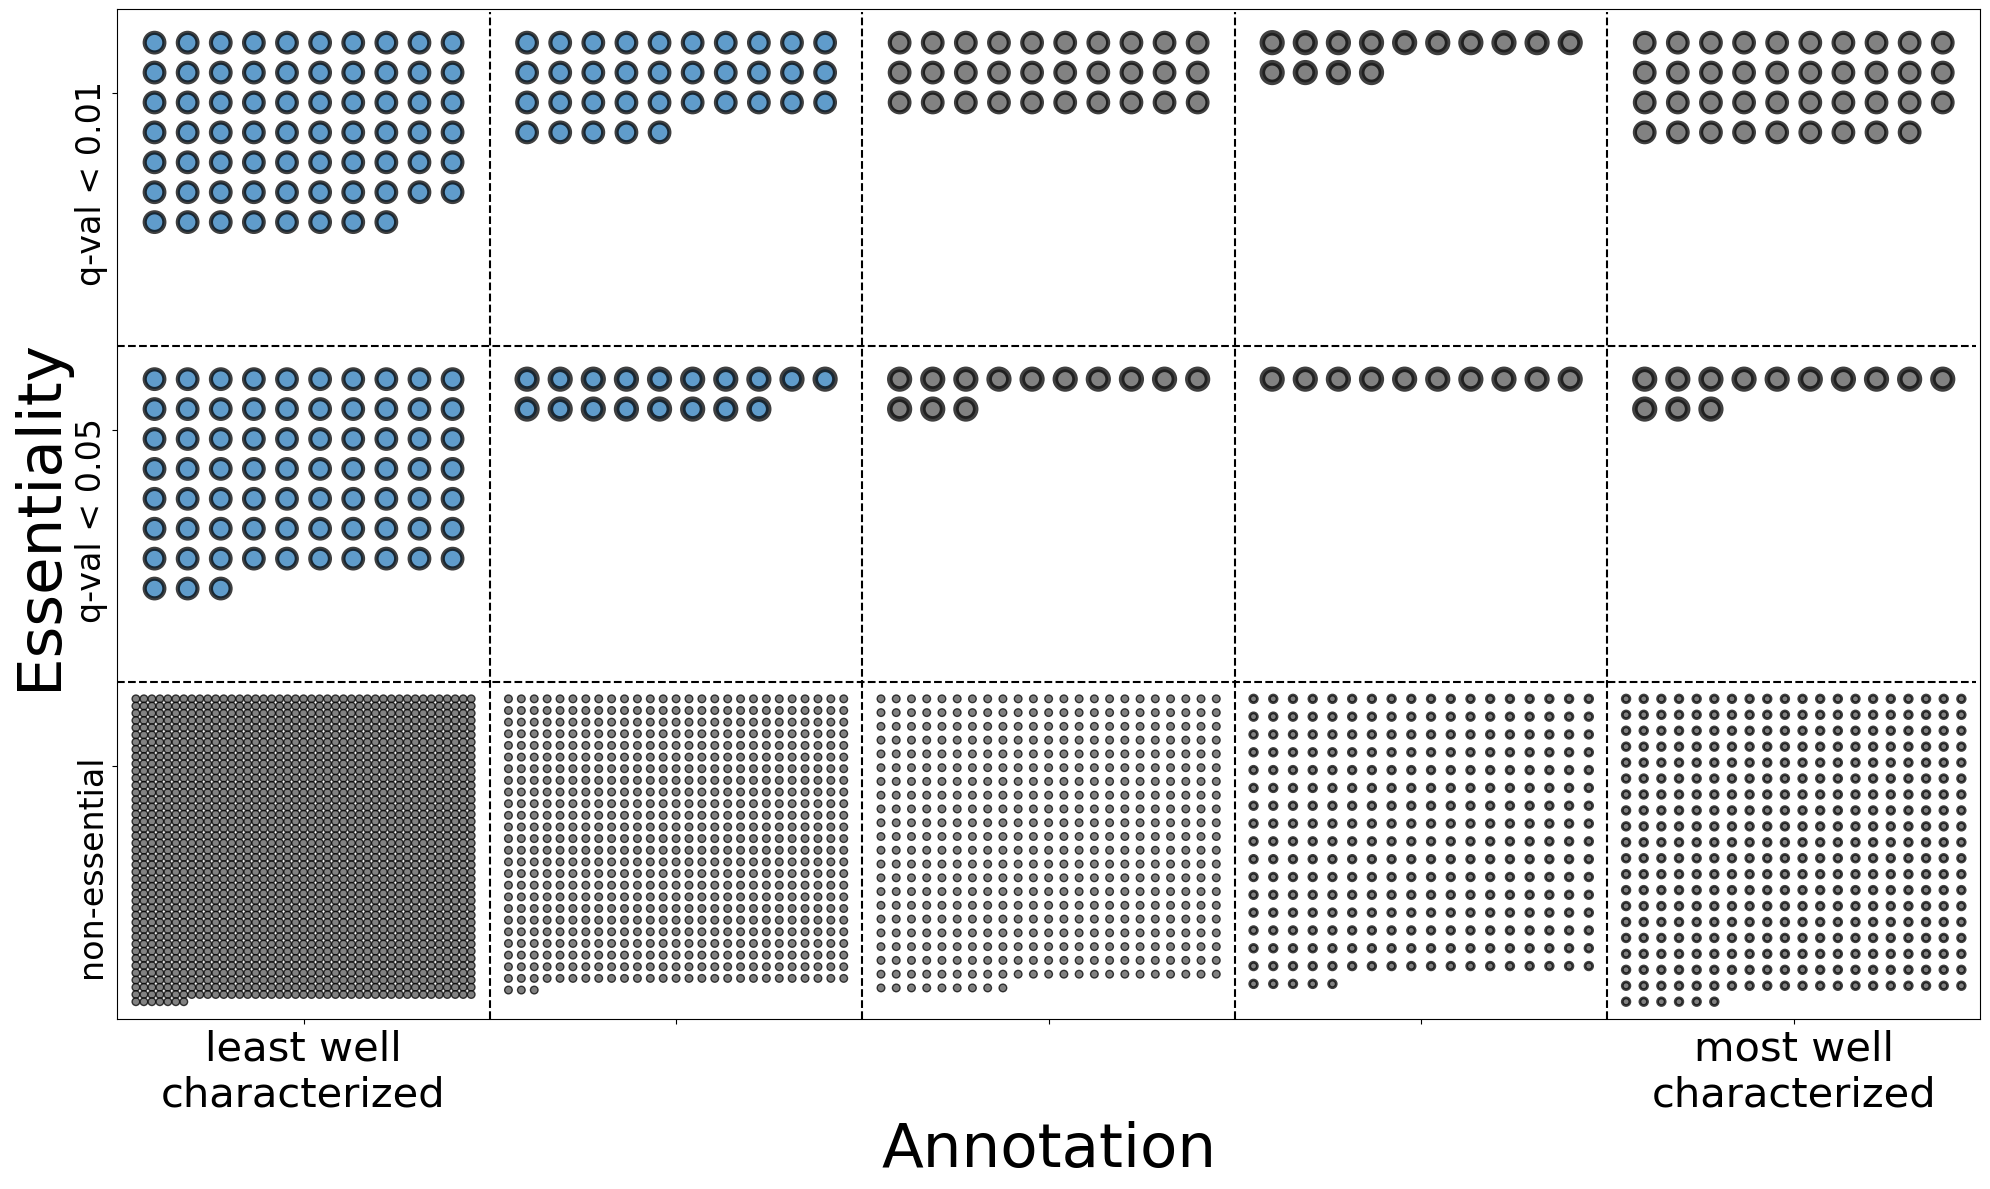

In [13]:
plt.figure(figsize = (20, 12))

for x in np.arange(1.5, 5.5, 1):
    yvals = np.arange(0.5, 3.5, 0.01)
    xvals = len(yvals)*[x]
    plt.plot(xvals, yvals, '--', color = "k")
    
for y in np.arange(1.5, 3.5, 1):
    xvals = np.arange(0.5, 5.5, 0.01)
    yvals = len(xvals)*[y]
    plt.plot(xvals, yvals, '--', color = "k")
    
plt.scatter(x_coords_list, y_coords_list, c = color_list, s = scatter_size_list, edgecolors='k', linewidths=lw_list, alpha = 0.75)

plt.xlabel('Annotation', fontsize = 44)
plt.ylabel('Essentiality', fontsize = 44)
plt.xticks([1, 2, 3, 4, 5], ['least well\ncharacterized','' , '', '', 'most well\ncharacterized'], fontsize = 30)
plt.yticks([1.25, 2.25, 3.25], ['non-essential' ,'q-val < 0.05', 'q-val < 0.01'], fontsize = 24, rotation = 90)
plt.xlim(0.5, 5.5)
plt.ylim(0.5, 3.5)
plt.tight_layout()

In [14]:
df_vis[ (df_vis.q_val_D.values >= 3) & (df_vis.Annotation.values == 1)]

Rv_ID  dejesus_H37Rv_day32_vs_dejesus_H37Rv_day0  q_val_D  Annotation
6      Rv0007                                    0.00263        3           1
67    Rv0067c                                    0.00478        3           1
164    Rv0161                                    0.00000        3           1
208   Rv0204c                                    0.00000        3           1
242    Rv0238                                    0.00000        3           1
...       ...                                        ...      ...         ...
3561   Rv3516                                    0.00000        3           1
3585  Rv3540c                                    0.00676        3           1
3587  Rv3542c                                    0.00000        3           1
3697   Rv3651                                    0.00478        3           1
3827   Rv3775                                    0.00676        3           1

[68 rows x 4 columns]

# WITH PLOTLY

In [15]:
import plotly.graph_objs as go

In [16]:
def unknown_essential_xy_plotly(selected_data):
    df_vis = selected_data.dropna(subset=['annotation_score'])
    df_vis = df_vis.reset_index(drop=True)

    # NO MORE RANDOMIZATION! Instead this:
    rv_id_list = []
    x_coords_list = []
    y_coords_list = []
    color_list = []
    scatter_size_list = []
    lw_list = []

    for ann in [1, 2, 3, 4, 5]:
        for qq in [1, 2, 3]:

            df = df_vis[(df_vis.q_val_D.values == qq) &
                        (df_vis.annotation_score.values == ann)]
            # update rv_id list
            rv_id_list.append(list(df.Rv_ID.values))

            if df.shape[0] < 30:
                scatter_size = 7
                edge_param = 0.40
                lw = 4
            elif df.shape[0] < 100:
                scatter_size = 7
                edge_param = 0.40
                lw = 3
            elif df.shape[0] < 200:
                scatter_size = 3
                edge_param = 0.45
                lw = 2
            elif df.shape[0] < 400:
                scatter_size = 3
                edge_param = 0.45
                lw = 2
            else:
                scatter_size = 3
                edge_param = 0.45
                lw = 1

            # Update scatter marker size
            scatter_size_list += [scatter_size] * df.shape[0]
            # Update line-width size
            lw_list += [lw] * df.shape[0]

            if ann <= 2 and qq >= 2:
                color_temp = '#2b7bba'
            else:
                color_temp = '#585858'

            # update color_list
            color_list += [color_temp] * df.shape[0]

            # num_sqrs = int(np.ceil(np.sqrt(df.shape[0])))
            num_sqrs = np.max([int(np.ceil(np.sqrt(df.shape[0]))), 10])

            xrange = np.linspace(ann - edge_param, ann + edge_param, num_sqrs)
            yrange = np.linspace(qq + edge_param, qq - edge_param, num_sqrs)

            coords = list(itertools.product(yrange, xrange))
            coords = coords[:df.shape[0]]
            x_coords = [c[1] for c in coords]
            y_coords = [c[0] for c in coords]
            # update coordinates
            x_coords_list += x_coords
            y_coords_list += y_coords

    return x_coords_list, y_coords_list, color_list, rv_id_list, scatter_size_list, lw_list

In [17]:
def update_bubble_mock(dff):
    x_coords_list, y_coords_list, color_list, rv_id_list, scatter_size_list, lw_list = unknown_essential_xy_plotly(
        dff)
    
    #make list of lines to add
    lines_add = []
    for x in [1.5, 2.5, 3.5, 4.5]:
        lines_add.append({'type': 'line',
                          'xref': 'x',
                          'yref':'y',
                          'x0': x,
                          'y0': 0.5,
                          'x1': x,
                          'y1': 3.5,
                          'line':{'dash': 'dot', 
                                  'color': 'grey'}
                         })
    for y in [1.5, 2.5]:
        lines_add.append({'type': 'line',
                          'xref': 'x',
                          'yref':'y',
                          'x0': 0.5,
                          'y0': y,
                          'x1': 5.5,
                          'y1': y,
                          'line':{'dash': 'dot', 
                                  'color': 'grey'}
                         })
    fig = {
        'data': [
            go.Scatter(
                x=x_coords_list,
                y=y_coords_list,
                text=rv_id_list,
                mode='markers',
                hoverinfo='text',
                marker_size=scatter_size_list,
                marker={
                    'line': {'width': 1.5, 'color': 'black'},
                    'color': color_list
                }
            )
        ],
        'layout': go.Layout(
            autosize=True,
            #ONLY FOR MOCK
            plot_bgcolor="rgba(0,0,0,0)",
            paper_bgcolor="rgba(0,0,0,0)",
            # width=800,
            # height=500,
            shapes = lines_add,
            xaxis=go.layout.XAxis(
                tickmode='array',
                tickvals=[1, 2, 3, 4, 5],
                ticktext=['most well<br>characterized', '', '', '',
                          'least well<br>characterized'],
                tickfont=dict(size=14),
                title='Annotation',
                showgrid=False
            ),
            yaxis=go.layout.YAxis(
                tickmode='array',
                tickvals=[1, 2, 3],
                ticktext=['non-essential', 'q-val < 0.05', 'q-val < 0.01'],
                tickangle=270,
                tickfont=dict(size=14),
                title='Essentiality',
                showgrid=False
            ),
            margin={'l': 30, 'b': 100, 't': 10, 'r': 10},
            legend={'x': 0, 'y': 1},
            hovermode='closest'
        )
    }
    return fig

In [18]:
df_vis.head()

Rv_ID  dejesus_H37Rv_day32_vs_dejesus_H37Rv_day0  q_val_D  Annotation
0  Rv0001                                    1.00000        1           4
1  Rv0002                                    1.00000        1           4
2  Rv0003                                    0.25783        1           2
3  Rv0004                                    1.00000        1           1
4  Rv0005                                    0.30857        1           5

In [19]:
df_vis_plotly = df_vis.rename(columns={'Annotation':'annotation_score'})

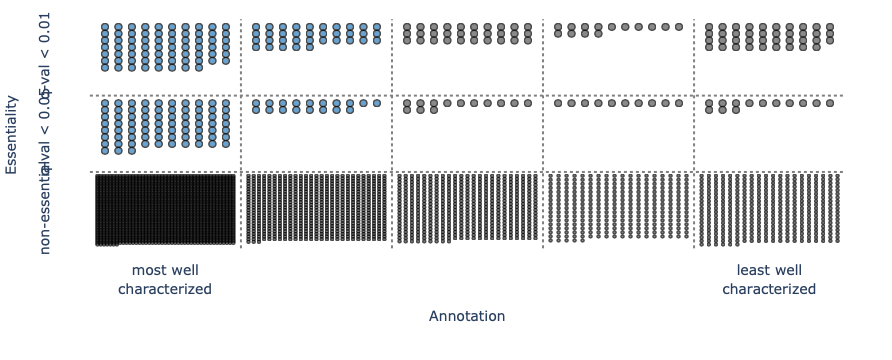

In [20]:
fig = update_bubble_mock(df_vis_plotly)
import plotly.io as pio

pio.show(fig)